# Notes
`Course Instructor`: **John Chiasson**

`Author (TA)`: **Ruthvik Vaila**
* This notebook shows how to use the multilevel dataframes in pandas.
* This can be used to analyze the results for a hyper-parameter study.
* This notebook demonstrates the usage of multi-level dataframes using randomly generated hyper-parameter values and accuracies. 
* Replace these random values with the ones that you obtained.

# Imports

In [2]:
import os, sys
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
print(sys.version)
import scipy
import scipy.interpolate
%matplotlib notebook

3.6.8 (default, Oct  9 2019, 14:04:01) 
[GCC 5.4.0 20160609]


# Section 1

In [3]:
np.random.seed(100)
drops = [0.125, 0.25, 0.5]
n_reps = 10
n_lmbdas = 3
lmbdas = (np.random.uniform(50, 65, n_lmbdas)*1e4).tolist()*n_reps*len(drops)
accs = np.random.uniform(80, 85, len(lmbdas))
drops = np.repeat(drops, n_reps*n_lmbdas).tolist()

In [4]:
df = pd.DataFrame({'drops':drops, 'lmbdas':lmbdas, 'accs':accs})

In [5]:
df.head(15)

drops         lmbdas       accs
0   0.125  581510.741269  84.223881
1   0.125  541755.407764  80.023594
2   0.125  563677.638612  80.607846
3   0.125  581510.741269  83.353745
4   0.125  541755.407764  84.129264
5   0.125  563677.638612  80.683533
6   0.125  581510.741269  82.875467
7   0.125  541755.407764  84.456610
8   0.125  563677.638612  81.046011
9   0.125  581510.741269  80.926641
10  0.125  541755.407764  80.541884
11  0.125  563677.638612  81.098487
12  0.125  581510.741269  84.893119
13  0.125  541755.407764  84.058416
14  0.125  563677.638612  80.859705

<IPython.core.display.Javascript object>


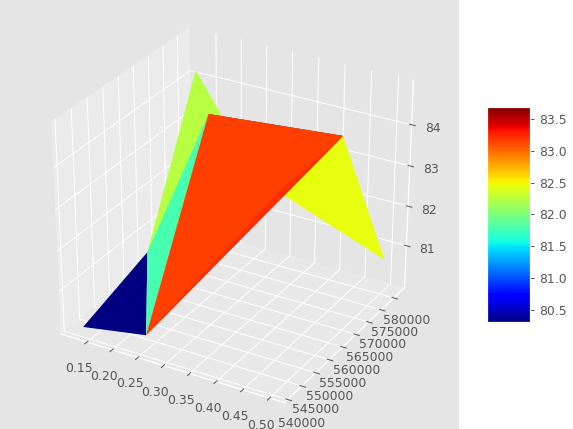

In [6]:
plt.style.use('ggplot')
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(df.drops, df.lmbdas, df.accs, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.savefig('teste.pdf')
plt.show()

# Section 2

In [7]:
np.random.seed(100)
drops = [0.125, 0.25]
n_reps = 2
n_lmbdas = 5
lmbdas = (np.random.uniform(50, 65, n_lmbdas)*1e4).tolist()*n_reps*len(drops)
accs = np.random.uniform(80, 85, len(lmbdas))
drops = np.repeat(drops, n_reps*n_lmbdas).tolist()

In [8]:
arrays = [drops, lmbdas]

In [9]:
index = pd.MultiIndex.from_arrays(arrays, names=['drops', 'lmbdas'])

In [10]:
index

MultiIndex([(0.125, 581510.7412686448),
            (0.125, 541755.4077640694),
            (0.125, 563677.6386123699),
            (0.125, 626716.4198479855),
            (0.125, 500707.8284286459),
            (0.125, 581510.7412686448),
            (0.125, 541755.4077640694),
            (0.125, 563677.6386123699),
            (0.125, 626716.4198479855),
            (0.125, 500707.8284286459),
            ( 0.25, 581510.7412686448),
            ( 0.25, 541755.4077640694),
            ( 0.25, 563677.6386123699),
            ( 0.25, 626716.4198479855),
            ( 0.25, 500707.8284286459),
            ( 0.25, 581510.7412686448),
            ( 0.25, 541755.4077640694),
            ( 0.25, 563677.6386123699),
            ( 0.25, 626716.4198479855),
            ( 0.25, 500707.8284286459)],
           names=['drops', 'lmbdas'])

In [11]:
df2 = pd.DataFrame({'accs':accs}, index=index)

In [12]:
df2.head(40)

accs
drops lmbdas                  
0.125 581510.741269  80.607846
      541755.407764  83.353745
      563677.638612  84.129264
      626716.419848  80.683533
      500707.828429  82.875467
      581510.741269  84.456610
      541755.407764  81.046011
      563677.638612  80.926641
      626716.419848  80.541884
      500707.828429  81.098487
0.250 581510.741269  84.893119
      541755.407764  84.058416
      563677.638612  80.859705
      626716.419848  84.081124
      500707.828429  81.370369
      581510.741269  82.158521
      541755.407764  84.700149
      563677.638612  84.088247
      626716.419848  81.680560
      500707.828429  80.877052

In [13]:
group_by_lmbda = df2.groupby(level=['drops', 'lmbdas'])

In [14]:
df3 = group_by_lmbda.mean()
df3

accs
drops lmbdas                  
0.125 500707.828429  81.986977
      541755.407764  82.199878
      563677.638612  82.527952
      581510.741269  82.532228
      626716.419848  80.612709
0.250 500707.828429  81.123711
      541755.407764  84.379282
      563677.638612  82.473976
      581510.741269  83.525820
      626716.419848  82.880842

In [17]:
df3.unstack()

accs                                                        
lmbdas 500707.828429 541755.407764 563677.638612 581510.741269 626716.419848
drops                                                                       
0.125      81.986977     82.199878     82.527952     82.532228     80.612709
0.250      81.123711     84.379282     82.473976     83.525820     82.880842

In [18]:
df3.unstack()['accs']

lmbdas  500707.828429  541755.407764  563677.638612  581510.741269  \
drops                                                                
0.125       81.986977      82.199878      82.527952      82.532228   
0.250       81.123711      84.379282      82.473976      83.525820   

lmbdas  626716.419848  
drops                  
0.125       80.612709  
0.250       82.880842

<IPython.core.display.Javascript object>


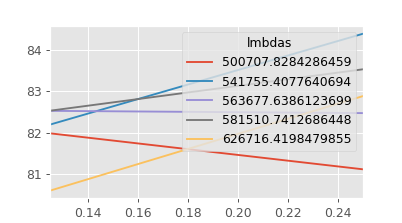

In [19]:
fig, ax = plt.subplots(figsize=(4.5,2.5))
df3.unstack()['accs'].plot(ax=ax)
plt.show()